# DBSCAN

### How does it work:

    - DBSCAN focuses on using density of points as its main factor for assinging cluster labels.
    - Creates ability to find cluster segmentations that other algos have difficulty with.
    - e.g. moon shaped plots which would have problem with distance based metrics.(see below) 
    
    - DBSCAN iterates through points and uses two key hyperparameters (epsilon and minimum number of points) 
    to assign cluster labels:
        1. Epsilon: distance extended from a point
        2. Minimum number of points: MnoPs in an epsilon distance. 
        
    - DBSCAN point types: Core, Border, Outlier:
    
        1. Core:
        Randomly chooses point and checks type, then uses epsilon distance as radius/range from chosen point and min number of points within that radius to identify other points from that random point that fall in the radius - if hyperparameters are satisfied, DBSCAN  labels point type as core. point with min points in epsilon range. 
        
        2. Border: 
        in Epsilon range of core point but does not contain min. number of points. e.g. a point within the epsilon range of a core point, but within its own range does not satisfy the min number of points hyper parameter.
        
        Core and border points can belong to the same cluster.
        
        3. Outlier: points that cannot be reached by points in a cluster assignment. 
        
        
### DBSCAN Procedure:
    
    - pick random point not yet assigned
    - determine point type
    - once a core point has been found, add all directly reachable points to the same cluster as core.
    - repeat until all points have been assigned to a cluster or as an outlier.
    
# Visualisation:

    - https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/ (smiley face visualisation)

### DBSCAN vs K-Means Clustering:

In [14]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
#SIMPLY EXPLORING AND VISUALISING
blobs_df = pd.read_csv('DATA/cluster_blobs.csv')

In [16]:
blobs_df.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<AxesSubplot:xlabel='X1', ylabel='X2'>

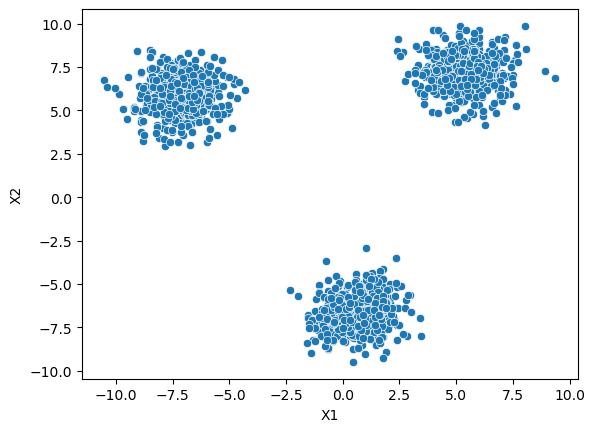

In [21]:
sns.scatterplot(data=blobs_df,x='X1',y='X2')

In [18]:
moons = pd.read_csv('DATA/cluster_moons.csv')

In [12]:
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


<AxesSubplot:xlabel='X1', ylabel='X2'>

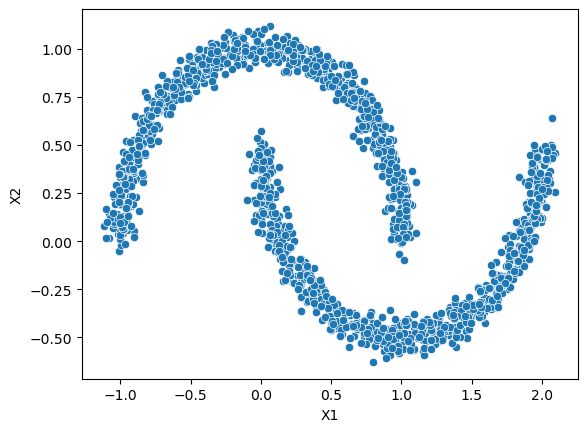

In [20]:
sns.scatterplot(data=moons,x='X1',y='X2')

In [22]:
circles = pd.read_csv('DATA/cluster_circles.csv')

In [23]:
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


<AxesSubplot:xlabel='X1', ylabel='X2'>

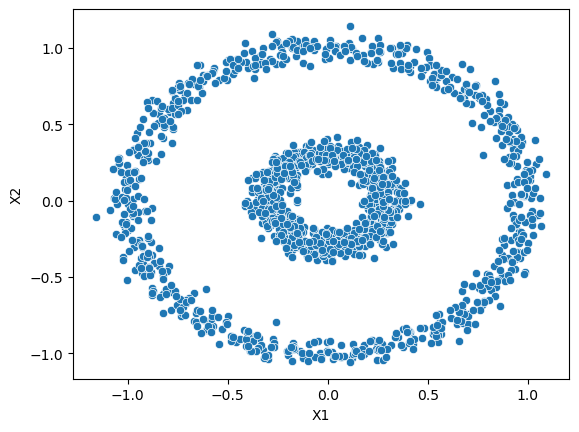

In [24]:
sns.scatterplot(data=circles,x='X1',y='X2')

In [25]:
#function to display categories

def display_cat(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='viridis')

In [26]:
from sklearn.cluster import KMeans

In [27]:
model = KMeans(n_clusters=3)

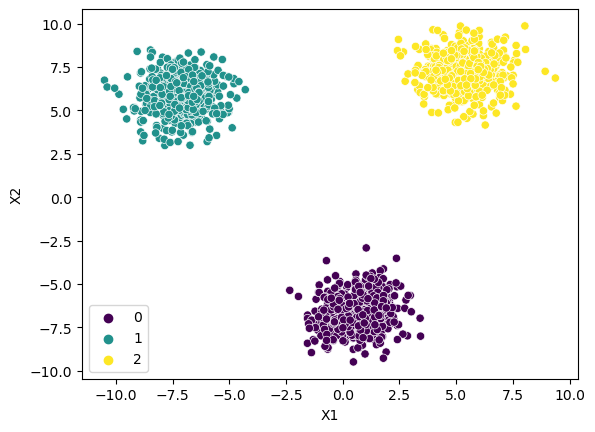

In [28]:
display_cat(model,blobs_df)

In [29]:
model = KMeans(n_clusters=2)

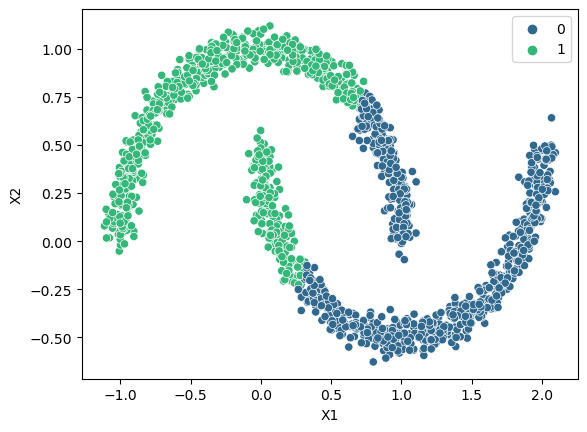

In [30]:
display_cat(model,moons)

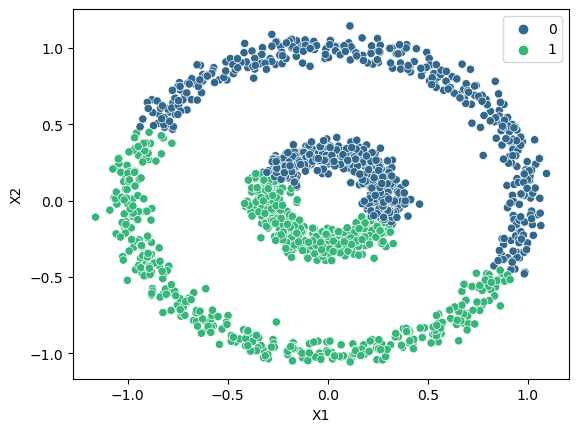

In [31]:
model = KMeans(n_clusters=2)
display_cat(model,circles)

In [32]:
#help(DBSCAN)

In [33]:
from sklearn.cluster import DBSCAN

In [34]:
model = DBSCAN()

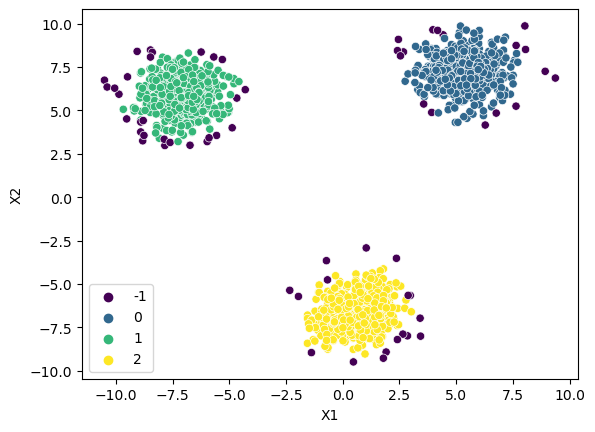

In [35]:
display_cat(model,blobs_df)

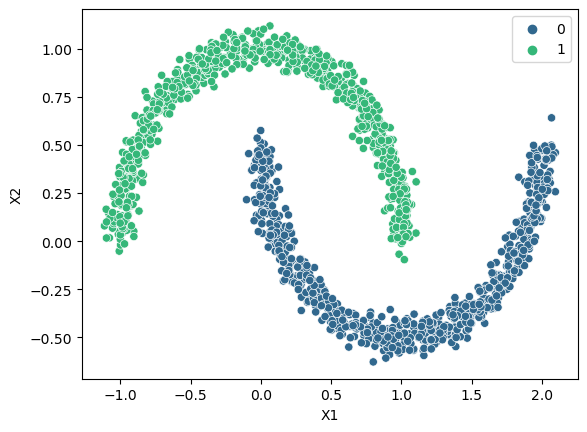

In [37]:
model = DBSCAN(eps=0.15)
display_cat(model,moons)

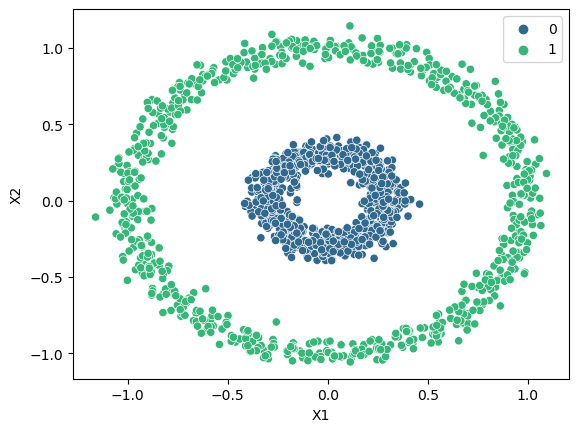

In [38]:
display_cat(model,circles)

## Hyperparameter Theory

*`Epsilon Intuition`*:
    - increasing allows more points to be core points whihch results in more border points and less outliers due to epsilon range/radius.
    - Decreasing value means more unique clusters 
    - Finding value is extremely dependent on particular data set and domain space 
        - domain knowledge very handy here as intuition and expectations play a huge part
        - could plot out elbow/knee diagram to compare epsilon values. 
 
*`Min. Number of samples intuition`*:
    - increasing to a larger number causes more points to be considered unique outliers.
    - choose by testing (plot min number against number of outliers).
    - 

### Hyperparameter Tuning Methods 

In [39]:
two_blobs = pd.read_csv('DATA/cluster_two_blobs.csv')
two_blobs_outliers = pd.read_csv('DATA/cluster_two_blobs_outliers.csv')

<AxesSubplot:xlabel='X1', ylabel='X2'>

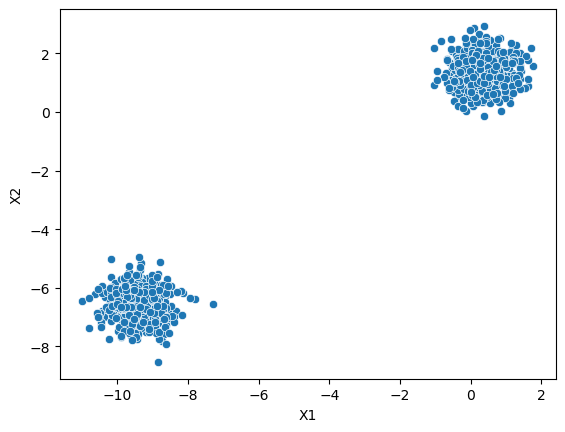

In [40]:
sns.scatterplot(data=two_blobs,x='X1',y='X2',palette='viridis')

<AxesSubplot:xlabel='X1', ylabel='X2'>

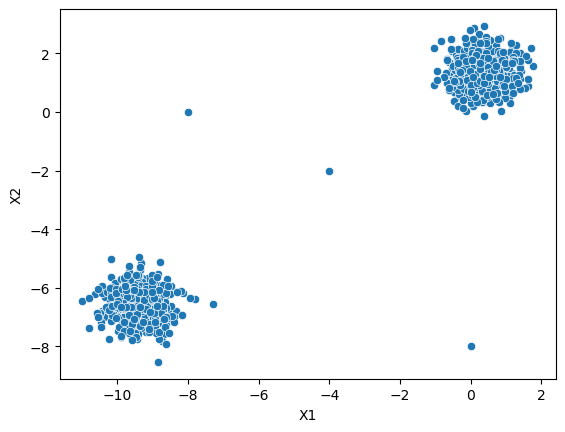

In [41]:
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2',palette='viridis')

### Label discovery and how its effected by hyperparameters

In [42]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

In [43]:
from sklearn.cluster import DBSCAN

In [47]:
dbscan = DBSCAN() #default params

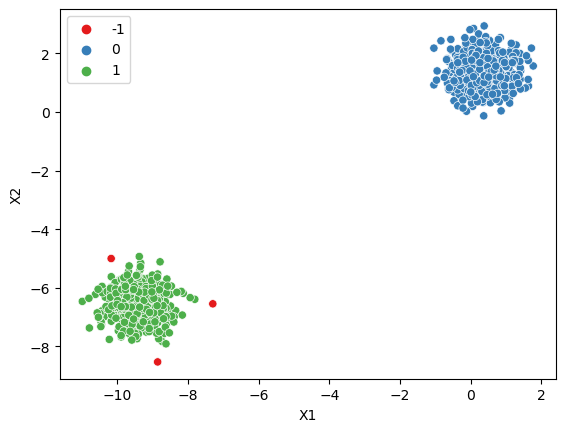

In [45]:
display_categories(dbscan,two_blobs)

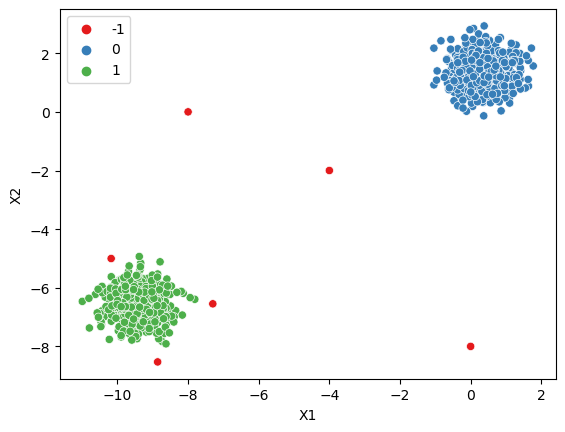

In [46]:
display_categories(dbscan,two_blobs_outliers)

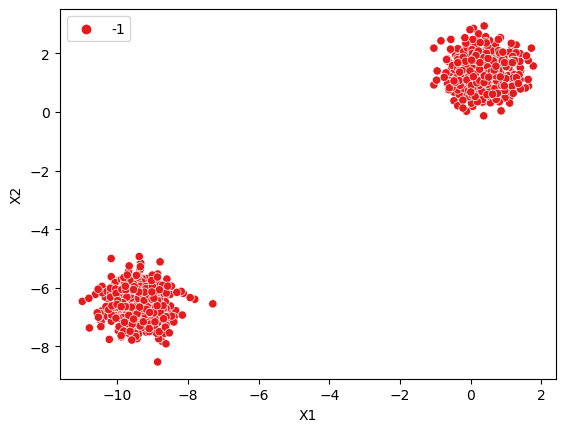

In [48]:
dbscan = DBSCAN(eps=0.001) #tiny eps - everything as outlier
display_categories(dbscan,two_blobs)

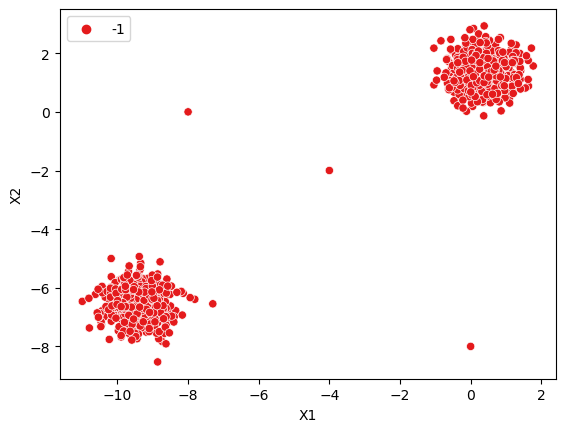

In [49]:
dbscan = DBSCAN(eps=0.001) #tiny eps - everything as outlier
display_categories(dbscan,two_blobs_outliers)

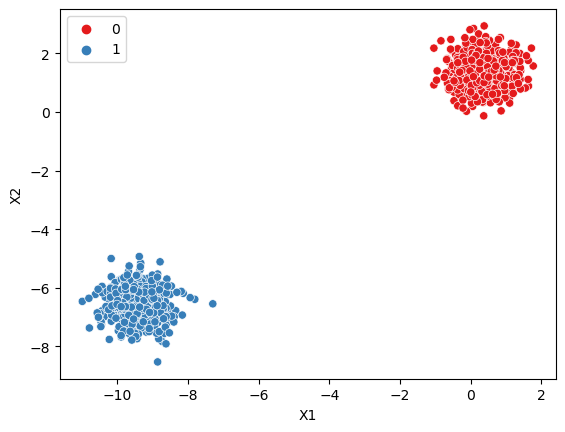

In [50]:
dbscan = DBSCAN(eps=1) 
display_categories(dbscan,two_blobs)

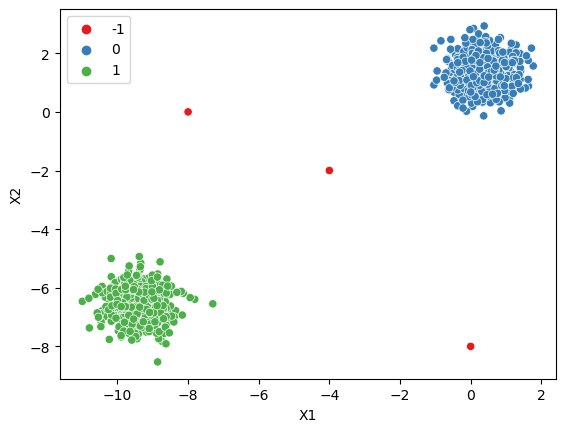

In [51]:
dbscan = DBSCAN(eps=1) 
display_categories(dbscan,two_blobs_outliers)

In [66]:
#totals
print(np.sum(dbscan.labels_ == 1 ))
print(np.sum(dbscan.labels_ == 0 ))
print(np.sum(dbscan.labels_ == -1 ))

print(len(dbscan.labels_))

500
500
3
1003


In [64]:
# percentages 
print(100 * np.sum(dbscan.labels_ == 1 ) / len(dbscan.labels_))
print(100 * np.sum(dbscan.labels_ == 0 ) / len(dbscan.labels_))
print(100 * np.sum(dbscan.labels_ == -1 ) / len(dbscan.labels_))

49.85044865403788
49.85044865403788
0.29910269192422734


In [85]:
outlier_percent = []
no_outliers = []

for eps in np.linspace(0.001,5,100):

    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    #total outliers
    no_outliers.append(np.sum(dbscan.labels_ == -1))
    
    #outlier percent
    outlier_per_calc = 100 * np.sum(dbscan.labels_ == -1 ) / len(dbscan.labels_)
    outlier_percent.append(outlier_per_calc)
    

<AxesSubplot:>

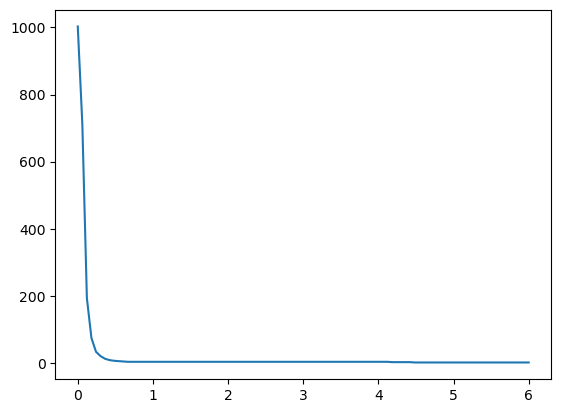

In [93]:
sns.lineplot(x=np.linspace(0.001,6,100),y=no_outliers)

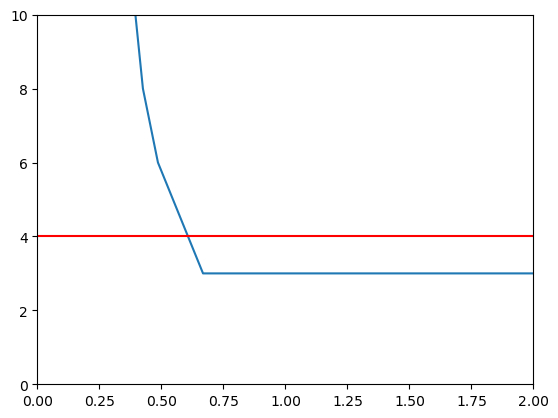

In [94]:
sns.lineplot(x=np.linspace(0.001,6,100),y=no_outliers)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=4,xmin=0,xmax=2,color='red')

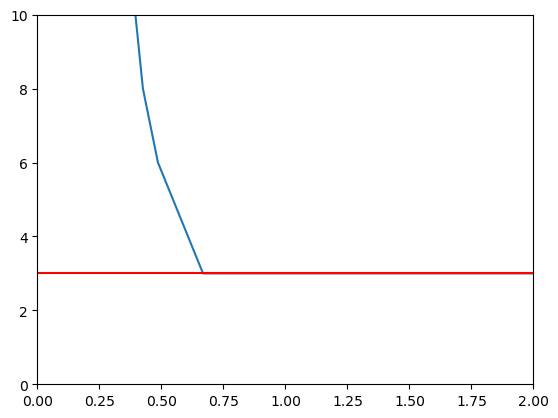

In [95]:
sns.lineplot(x=np.linspace(0.001,6,100),y=no_outliers)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=3,xmin=0,xmax=2,color='red')

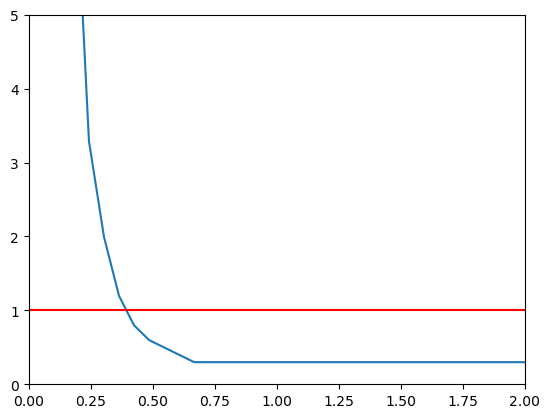

In [98]:
sns.lineplot(x=np.linspace(0.001,6,100),y=outlier_percent)
plt.xlim(0,2)
plt.ylim(0,5)
plt.hlines(y=1,xmin=0,xmax=2,color='red')

In [104]:
outlier_percent = []
no_outliers = []

for n in np.arange(1,100):

    dbscan = DBSCAN(min_samples= n)
    
    dbscan.fit(two_blobs_outliers)
    
    #total outliers
    no_outliers.append(np.sum(dbscan.labels_ == -1))
    
    #outlier percent
    outlier_per_calc = 100 * np.sum(dbscan.labels_ == -1 ) / len(dbscan.labels_)
    outlier_percent.append(outlier_per_calc)
    

Text(0, 0.5, 'percent of points classified as outlier')

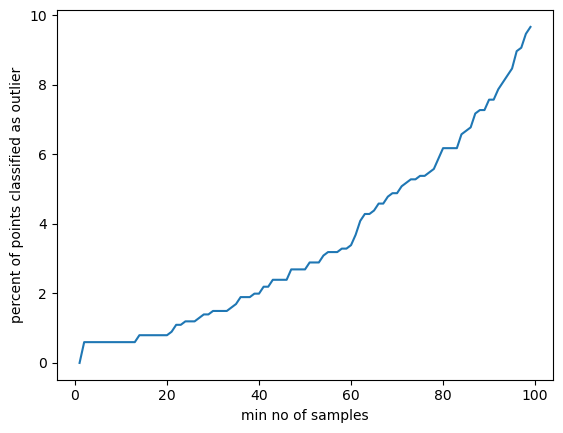

In [106]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)
plt.xlabel('min no of samples')
plt.ylabel('percent of points classified as outlier')

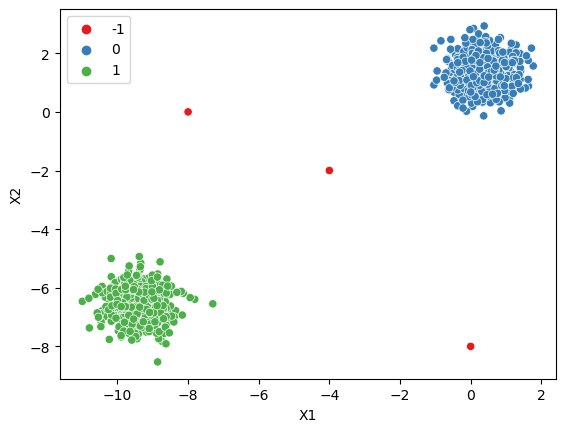

In [107]:
#good suggestion for min number of samples is 2* dimension of data 
num_dim = two_blobs_outliers.shape[1] #X1,X2
dbscan = DBSCAN(min_samples=2*num_dim,eps=0.75) 
display_categories(dbscan,two_blobs_outliers)

In [108]:
len(np.unique(dbscan.labels_))

3